## Lesson 08 - Scikit-Learn

Welcome to lesson 9, on machine learning with scikit-learn.

Machine learning is a rapidly growing and advancing field, and the premier module for carrying it out in Python is scikit-learn (aka scikits-learn). Today we will cover the basic syntax and logic of the module, without touching too deeply on the wide array of methods available.

Download the [notebook here](/pythoncourse/assets/notebooks/applied/lesson 08 applied.ipynb)

### Machine Learning 101

We can define machine learning as building a program which can adapt to previously seen data - we build an algorithm, which takes data as an input and outputs predictions, once being trained on a training set.

We can broadly define machine learning into two major classes - Supervised and Unsupervised.

In supervised clustering we have known targets - eg an iris species, or a continuous variable such as retail spend for which we have both 'features', our predictors, and 'labels', our outputs.

We can further subsection this into clustering, with categorical labels, and regression, with continuous labels.

Similarly, we have unsupervised learning, in which we have features, but need to discover or define the labels ourselves based on the data. Again, this splits into clustering and regression. We can also often use unsupervised learning as a dimensional reduction tool - PCA can be seen as a sort of unsupervised learning.

There can also be some middle area between the methods - maybe we wish to validate our labels which we already have, or develop new ones.

### Scikit-Learn 101

Sklearn aims to be a unified module for all methods of machine learning, from data splitting, normalization and reduction through to model fitting, prediction and validation. The module is updated regularly to implement the most recent machine learning algorithms. [The website](http://scikit-learn.org/stable/) is a great resource for help, examples and explanations of the differing methods we can use.

sklearn does it best to implement the models in a uniform fashion, so we can pass in the same data, and use the same transform, fit, predict, score and other methods. This allows for a uniform workflow, and no need to transform data between formats for different models.

In sklearn, we have a standard data format for most algorithms input data:

A numpy array of dimensions 'samples' by 'features'. By Default these are stored as np.float64, but we can change this if desired. Additionally we can use the sparse matrix class from scipy if we have very large (and sparse) matrices.

Categorical features must be dummified (see last lesson)

In [2]:
from sklearn import datasets
import numpy as np

iris = datasets.load_iris()
print(iris.data[:6,:])

[[ 5.1  3.5  1.4  0.2]
 [ 4.9  3.   1.4  0.2]
 [ 4.7  3.2  1.3  0.2]
 [ 4.6  3.1  1.5  0.2]
 [ 5.   3.6  1.4  0.2]
 [ 5.4  3.9  1.7  0.4]]


Addtionally we have a target, or label array if we have a supervised learning dataset:

In [3]:
print(iris.target[:6])

[0 0 0 0 0 0]


In [4]:
print(iris.target_names)

['setosa' 'versicolor' 'virginica']


Feature engineering is one of the most important parts of machine learning and requires knowledge of the dataset. We will not cover non-automated feature engineering today.

![png](/pythoncourse/assets/sklearn/supervised.png)
![png](/pythoncourse/assets/sklearn/supervised.png)
both from http://www.astroml.org/sklearn_tutorial/general_concepts.html

Overfitting is a serious problem in machine learning models - recall the problem with [googles flu trends](http://www.wired.com/2015/10/can-learn-epic-failure-google-flu-trends/). It ended up predicting winter, rather than flu. Similarly, we might make a model that is really good at describing our current data, but extremely poor at predicting the labels for new data.

We can stop overfitting in several ways. The first is to train our predictive models on a training dataset, then test them on a held out, test set. This test set should never be used for fitting models! We should also use simpler models, and cross validation.

We have set ups for this in sklearn!

### Workflow

We will work through the sklearn workflow step by step. 

* split our data into test and train sets
* Preprocess our data - extract features, dummyify, normalise, dimension reduction
* Choose a model or models for our data
* Fit the models to our data
* Analyse our models output
* Validate our data on our test set and determine error
* Predict new data

### Splitting data

The [cross validation submodule](http://scikit-learn.org/stable/modules/cross_validation.html) is made to help avoid overfitting. The most common method is to hold some of the data out of the analysis, fit and then cimpare estimators on the test set.

Alternatively, the submodule contains methods for carrying out crossvalidation during fitting, these should be used with caution.

In [5]:
from sklearn.cross_validation import train_test_split

print(iris.data.shape)
X_train, X_test, y_train, y_test =\
   train_test_split(iris.data, iris.target, test_size=0.4, random_state=0)
print(X_train.shape)
print(X_test.shape)

(150, 4)
(90, 4)
(60, 4)


The function is smart, choosing to stratify within outcomes, and by default holds out 25% of the data. If we have time series or other structured data, a more complex scheme needs to be devised.

The test set should now not be touched until it's time for validation

### Preprocessing data

The next step is feature addition. This is the point where you can calculate your features. Many features can be created from the data (recall the work we did during the test). In general, it is best to carry out these operations with the test data removed, so that the process is the same for any new data.

Depending on your choice of method, remove correlated features.

Once this is carried out, we can use the [preprocessing submodule](http://scikit-learn.org/stable/modules/preprocessing.html#preprocessing) to process our data:

In [6]:
from sklearn import preprocessing

# we can dummify data using http://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.OneHotEncoder.html
# we can turn data into categories using http://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.binarize.html
# see also imputer!

scaler = preprocessing.StandardScaler()
#be careful to use the correct version!
scaler = scaler.fit(X_train)
X_train = scaler.transform(X_train)
print(X_train[:6,:])

[[ 0.18206758  0.71103882  0.45664061  0.5584109 ]
 [-1.17402201  0.00522823 -1.10334891 -1.19183221]
 [-0.04394735 -0.93585257  0.77939706  0.93346299]
 [-0.26996228 -0.93585257  0.29526238  0.1833588 ]
 [-0.26996228 -0.46531217 -0.02749407  0.1833588 ]
 [-0.38296975 -1.40639297  0.1876769   0.1833588 ]]


The next step to preprocess our data is optionally use matrix decomposition to reduce the number of dimensions our data has. We can use the [decomposition module](http://scikit-learn.org/stable/modules/decomposition.html):

In [7]:
from sklearn import decomposition

pca = decomposition.PCA(n_components=3)
#by fitting a model, we can transform our test data later using the transform method
pca.fit(X_train)
X_train = pca.transform(X_train)

Now we can put our normalised and transformed data into a model

### Choosing and Fitting a Model

Choosing a model is a statistical choice - I'll leave it to you. You could even [make your own](http://scikit-learn.org/stable/developers/contributing.html#rolling-your-own-estimator).

Generally, we have a wide range of standard machine learning models - Let's use a [support vector machine](https://en.wikipedia.org/wiki/Support_vector_machine) this time. Briefly, [an SVM draws](http://scikit-learn.org/stable/modules/svm.html) lines (or vector) between our classes of data, either linearly or by apply the ['kernel trick'](https://en.wikipedia.org/wiki/Kernel_method) to [make it non-linear](https://www.youtube.com/watch?v=3liCbRZPrZA). 

Again, as long as our data is in the correct format we can fit more or less any model from sklearn.

In [8]:
from sklearn import svm

rbf_svc = svm.SVC(kernel='rbf')
#hyperparameters!
#again, once a model is described, we need to fit it:
model = rbf_svc.fit(X_train, y_train)

In [9]:
model.predict(X_train)

array([1, 0, 2, 1, 1, 1, 1, 2, 0, 0, 2, 1, 0, 0, 1, 0, 2, 1, 0, 1, 2, 1, 0,
       2, 2, 2, 2, 0, 0, 2, 2, 0, 2, 0, 2, 2, 0, 0, 2, 0, 0, 0, 1, 2, 2, 0,
       0, 0, 1, 1, 0, 0, 1, 0, 2, 1, 2, 1, 0, 2, 0, 2, 0, 0, 2, 0, 2, 1, 1,
       1, 2, 2, 1, 2, 0, 1, 2, 2, 0, 1, 1, 2, 1, 0, 0, 0, 2, 1, 2, 0])

### Evaluating the model

Now we can evaluate our models, both on the training set, and on the test set.

We need to recreate our transformations on the test set....

In [10]:
#most models have a .score method, which is particular to them. It is normally 1 - out of classification rate
model.score(X_train, y_train)

0.97777777777777775

In [11]:
X_test = scaler.transform(X_test)
X_test = pca.transform(X_test)
model.predict(X_test)

array([2, 1, 0, 2, 0, 2, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 2, 1, 0,
       0, 2, 0, 0, 1, 1, 0, 2, 1, 0, 2, 2, 1, 0, 2, 1, 1, 2, 0, 2, 0, 0, 1,
       2, 2, 1, 2, 1, 2, 1, 1, 2, 1, 2, 2, 1, 2])

In [12]:
model.score(X_test, y_test)
#not quite as good, but much much better than the clustering we use last week

0.93333333333333335

We can also use the [metrics submodule](http://scikit-learn.org/stable/modules/model_evaluation.html) to do a ton of metrics about our fit, or make our own:

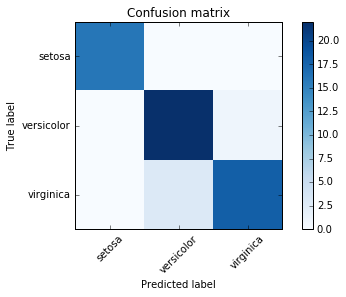

In [13]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
%matplotlib inline 

y_pred = model.predict(X_test)
cm = confusion_matrix(y_test, y_pred)

def plot_confusion_matrix(cm, title='Confusion matrix', cmap=plt.cm.Blues):
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(iris.target_names))
    plt.xticks(tick_marks, iris.target_names, rotation=45)
    plt.yticks(tick_marks, iris.target_names)
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    
plot_confusion_matrix(cm)

Now we can predict new data exactly as we did for our test set!

### Saving Models

We can save our model - a lot of algorithms will take a long time to train, and the prediction is much faster, especially as it is run on a small amount of newer data. To do this, we have to learn a little bit about pickling.

Briefly, we can see that python does not hold data as a tabular format in memory - we can give arbitrary classes, so it has no natural state to be stored on the disk. So far, every time we loaded or saved we used a csv or array, which is naturally sequential.

Python has a built in module, called pickle, to save its native binary representation of objects to disk. We will use the jobdumps module for now, as it is faster for sklearn objects (it is optimised for numpy arrays).

In [14]:
from sklearn.externals import joblib
joblib.dump(model, 'model.pkl') 

['model.pkl',
 'model.pkl_01.npy',
 'model.pkl_02.npy',
 'model.pkl_03.npy',
 'model.pkl_04.npy',
 'model.pkl_05.npy',
 'model.pkl_06.npy',
 'model.pkl_07.npy',
 'model.pkl_08.npy',
 'model.pkl_09.npy',
 'model.pkl_10.npy',
 'model.pkl_11.npy']

We can load it back in using

In [15]:
model = joblib.load('model.pkl') 

### Pipelines

We can see that the method we used was fine, but reconstituting the pathway we took through the processing was a little tricky for the test set. We need to make sure we don't miss a step, or our predictions will be off. We also needed to make sure we used the model based transformations, as otherwise we couldn't apply the same transformations to our new data.

To make this easier to redo, we can use the [pipelines submodule](http://scikit-learn.org/stable/modules/pipeline.html). Once we have a pipeline, we can call fit and predict as though it were a single model.


In [16]:
from sklearn import pipeline

#we get our estimators as a list of tuples:
estimators = [('normalise', preprocessing.StandardScaler()),
              ('reduce_dim', decomposition.PCA()),
              ('svm', svm.SVC(kernel='rbf'))]

pipe = pipeline.Pipeline(estimators)

In [17]:
X_train, X_test, y_train, y_test =\
   train_test_split(iris.data, iris.target, test_size=0.4, random_state=0)
pipe.fit(X_train, y_train)

Pipeline(steps=[('normalise', StandardScaler(copy=True, with_mean=True, with_std=True)), ('reduce_dim', PCA(copy=True, n_components=None, whiten=False)), ('svm', SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape=None, degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False))])

In [18]:
print(pipe.predict(X_test))
print(pipe.score(X_test, y_test))

[2 1 0 2 0 2 0 1 1 1 1 1 1 1 1 0 1 1 0 0 2 1 0 0 2 0 0 1 1 0 2 1 0 2 2 1 0
 2 1 1 2 0 2 0 0 1 2 2 1 2 1 2 1 1 2 1 2 2 1 2]
0.933333333333


We can change the parameters in a pipeline. One of the reasons we might want to to do this is to optimise a 'hyperparameter' one that does not depend on the model.

We can do this using the [gridsearch submodule](http://scikit-learn.org/stable/modules/grid_search.html):

In [19]:
from sklearn.grid_search import GridSearchCV

#in the SVC, C is the penalty term, lambda is the degree of the kernel
#we can change it using name__param
pipe.set_params(svm__C = 10)

Pipeline(steps=[('normalise', StandardScaler(copy=True, with_mean=True, with_std=True)), ('reduce_dim', PCA(copy=True, n_components=None, whiten=False)), ('svm', SVC(C=10, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape=None, degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False))])

Grid search lets us search a range of parameters to find the best one:

In [20]:
#again using name__param. Can do as many as we'd like!
params = {'svm__C':[0.1, 1, 10, 100]}
grid_search = GridSearchCV(pipe, param_grid=params)
grid = grid_search.fit(X_train, y_train)
print(grid.best_params_)
print(grid.best_score_)
print(grid.score(X_test, y_test))

{'svm__C': 10}
0.966666666667
0.933333333333


### Decision Trees and Random Forests

One of the most popular methods in machine learning is the random forest classifier.

We will briefly cover the theory behind it, before seeing a run example.

[Decision trees](http://scikit-learn.org/stable/modules/tree.html) [work with boolean logic](http://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html#sklearn.tree.DecisionTreeClassifier) - at each point, we split our data into two classes, based on whether they are above or below a certain value for a given feature. The algorithm chooses the feature with maximum information and then splits, until we rech our maximum depth, or are completely correctly classified:

In [21]:
from sklearn import tree
model = tree.DecisionTreeClassifier()
model = model.fit(X_train, y_train)

In [27]:
print(model.predict(X_test))
model.score(X_test, y_test)

[2 1 0 2 0 2 0 1 1 1 2 1 1 1 1 0 1 1 0 0 2 1 0 0 2 0 0 1 1 0 2 1 0 2 2 1 0
 2 1 1 2 0 2 0 0 1 2 2 1 2 1 2 1 1 2 2 1 2 1 2]


0.94999999999999996

In [30]:
model.predict_proba(X_test[:6,:])

array([[ 0.,  0.,  1.],
       [ 0.,  1.,  0.],
       [ 1.,  0.,  0.],
       [ 0.,  0.,  1.],
       [ 1.,  0.,  0.],
       [ 0.,  0.,  1.]])

Now we can see we have likely highly overfit our data - by going all the way to full resolution, we have described, but maybe not predicted well.

To fix this, we can use a [random forest classifier](http://www.stat.berkeley.edu/~breiman/RandomForests/cc_home.htm). A [good analogy is here](https://medium.com/@josemarcialportilla/enchanted-random-forest-b08d418cb411#.u3ue33opc). We want to bootstrap our original data - leading to a bagged forest, then also sample our features. These two methods lead to a random forest.

So, now we bootstrap our data, then bootstrap (or otehrwise sample) our features, and make a lot of decision trees. We can reduce the error and correct for correlated features very easily like this.

The [ensemble submodule](http://scikit-learn.org/stable/modules/ensemble.html) contains the [random forest classifier](http://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html)

We can choose the number of trees, criterion, maximum number of features, maximum depth of branches and seferal other options.

In [50]:
from sklearn import ensemble
model = ensemble.RandomForestClassifier(n_estimators=100)
model.fit(X_train, y_train)
print(model.predict(X_test))
model.score(X_test, y_test)

[2 1 0 2 0 2 0 1 1 1 2 1 1 1 1 0 1 1 0 0 2 1 0 0 2 0 0 1 1 0 2 1 0 2 2 1 0
 2 1 1 2 0 2 0 0 1 2 2 1 2 1 2 1 1 2 2 1 2 1 2]


0.94999999999999996

In [39]:
model.predict_proba(X_test[:6,:])

array([[ 0.   ,  0.01 ,  0.99 ],
       [ 0.   ,  0.985,  0.015],
       [ 0.992,  0.008,  0.   ],
       [ 0.   ,  0.008,  0.992],
       [ 1.   ,  0.   ,  0.   ],
       [ 0.   ,  0.003,  0.997]])

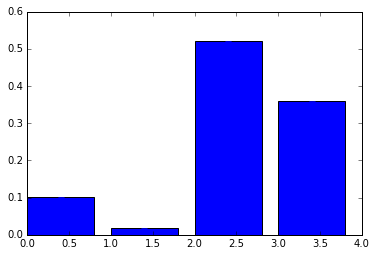

In [53]:
plt.bar(np.arange(4), height = model.feature_importances_, yerr = std);

We can see that we have probably overfit our training data now - we would do some crossvalidation etc to check how bad it really is.

One of the problems with random forests is they are very hard to interpret - we have no easy mapping of features to classes

There is still a ton more to learn from sklearn - we have not touch on ensemble models, roc curves, multithreading and a wide range of models.

Now we know the basic syntax of split, transform, fit, predict, score we can run most of the models in the module, and analyse their output. Further analysis is left to you to read the docs and understand them.

For the rest of the lesson, we will work through the titanic dataset example, fitted with a random forest model: http://nbviewer.jupyter.org/github/donnemartin/data-science-ipython-notebooks/blob/master/kaggle/titanic.ipynb

